# Task
Perform a multiple linear regression analysis on the Toyota Corolla dataset ("ToyotaCorolla.csv") to predict the price based on the given attributes. The analysis should include exploratory data analysis, data preprocessing, splitting the dataset, building and evaluating at least three multiple linear regression models, applying Lasso and Ridge regression, and addressing interview questions about normalization, standardization, and multicollinearity.

## Load the dataset

### Subtask:
Load the Toyota Corolla dataset from the provided CSV file into a pandas DataFrame.


**Reasoning**:
The subtask is to load the data into a pandas DataFrame. This requires importing the pandas library and reading the CSV file.



In [26]:
import pandas as pd

df = pd.read_csv('ToyotaCorolla - MLR.csv')

**Reasoning**:
The data has been loaded into the DataFrame. The next step is to display the first few rows to verify successful loading.



In [27]:
display(df.head())

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## Exploratory data analysis (eda)

### Subtask:
Perform EDA to understand the data distribution, identify potential issues, and visualize relationships between variables. This includes generating summary statistics and visualizations.


**Reasoning**:
Display column names and data types, generate descriptive statistics, and display the correlation matrix to understand the data structure, distribution, and relationships.



In [45]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   KM                1436 non-null   int64
 3   HP                1436 non-null   int64
 4   Automatic         1436 non-null   int64
 5   cc                1436 non-null   int64
 6   Doors             1436 non-null   int64
 7   Gears             1436 non-null   int64
 8   Weight            1436 non-null   int64
 9   Fuel_Type_CNG     1436 non-null   bool 
 10  Fuel_Type_Diesel  1436 non-null   bool 
 11  Fuel_Type_Petrol  1436 non-null   bool 
dtypes: bool(3), int64(9)
memory usage: 105.3 KB


None

In [44]:
display(df.describe())
correlation_matrix = df.corr(numeric_only=True)
display(correlation_matrix)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,6.000000,1615.00000


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198,-0.039536,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253,0.002389,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598,0.144016,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614,0.062109,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249,0.001486,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637,0.005941,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618,0.009680,0.025495,-0.027589
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613,-0.049537,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000,0.052756,0.568087,-0.560470
Fuel_Type_CNG,-0.039536,0.002389,0.144016,0.062109,0.001486,0.005941,0.009680,-0.049537,0.052756,1.000000,-0.038074,-0.296717


**Reasoning**:
Generate histograms for key numerical features to visualize their distributions and identify potential outliers. Also, create scatter plots to explore the relationships between the target variable ('Price') and relevant numerical features.



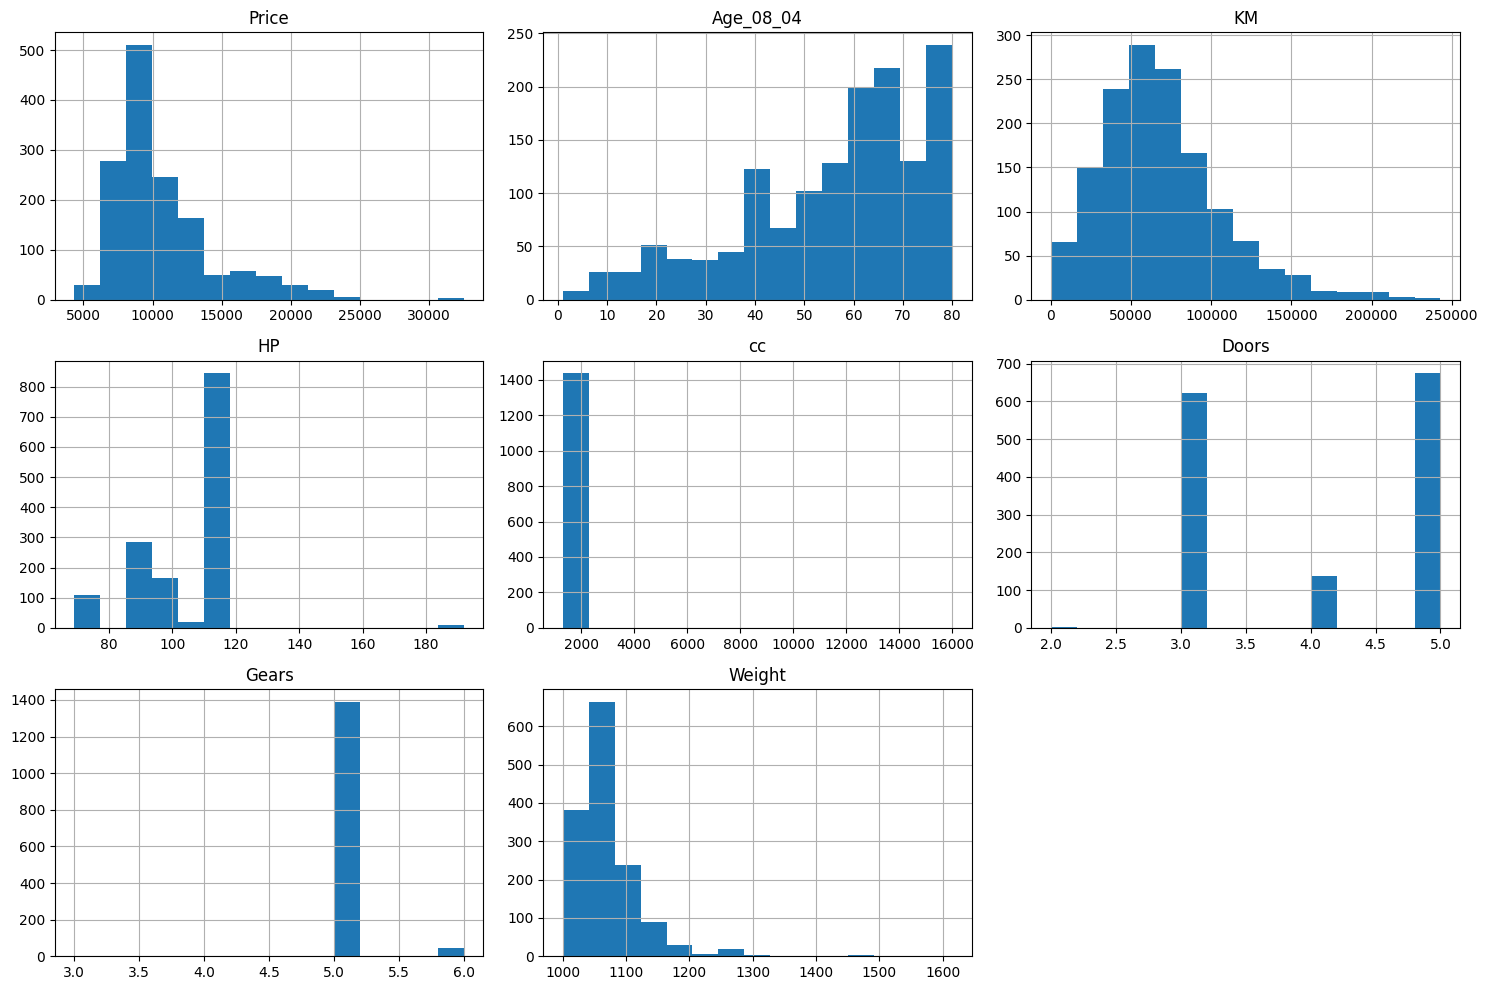

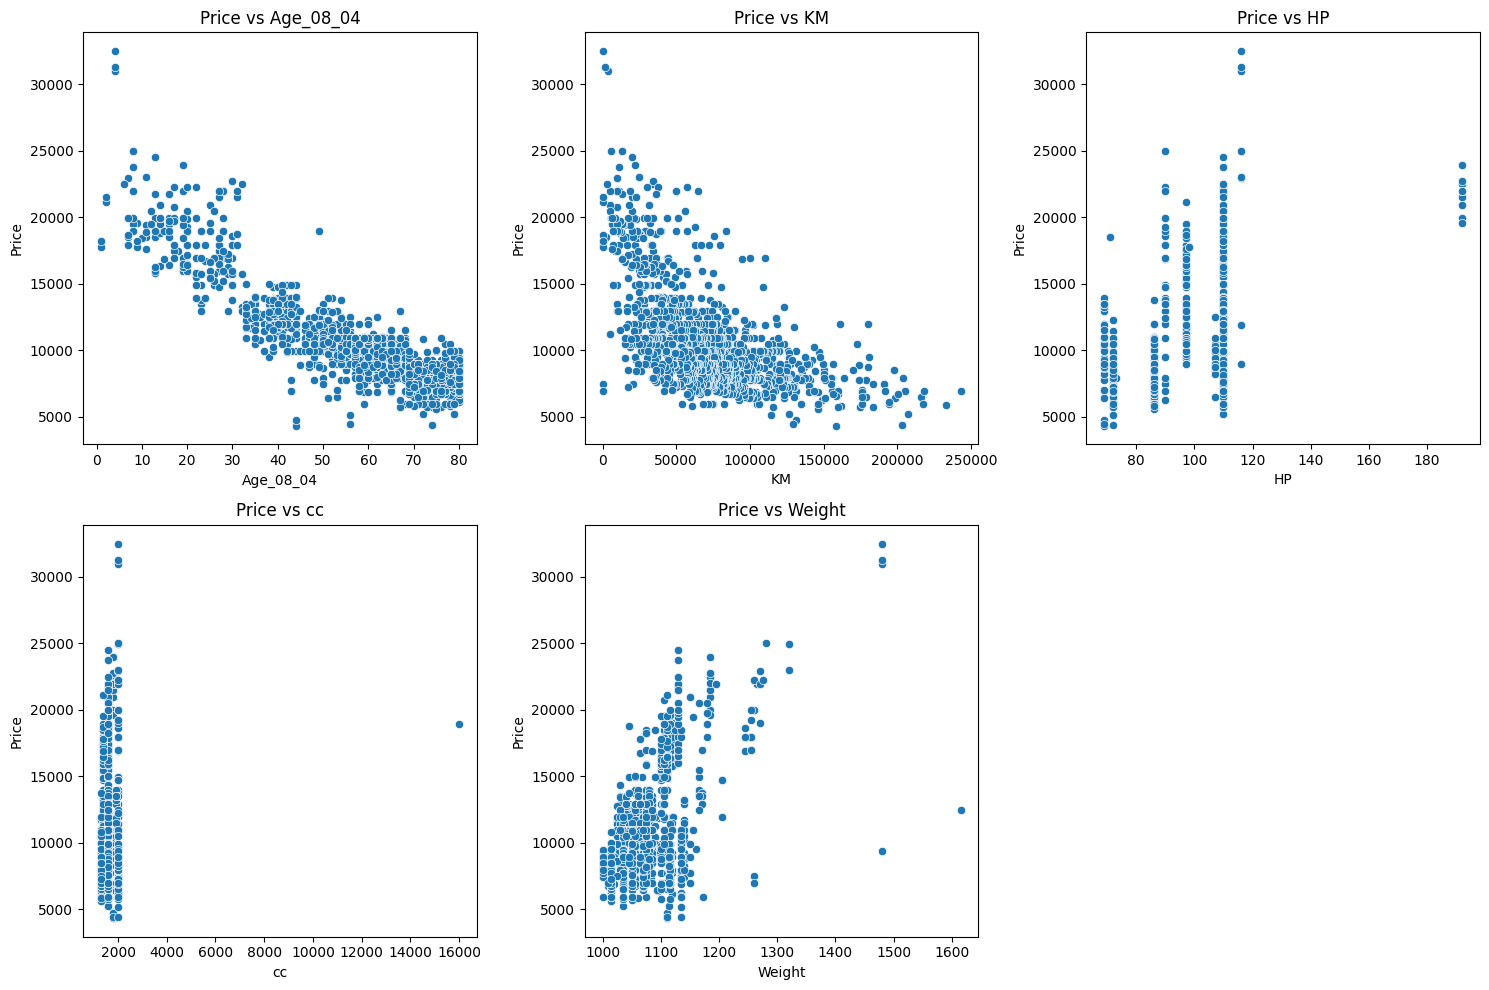

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']

# Histograms
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()


**Reasoning**:
Visualize the distribution of the categorical feature 'Fuel_Type' using a countplot to understand its categories and their frequencies.



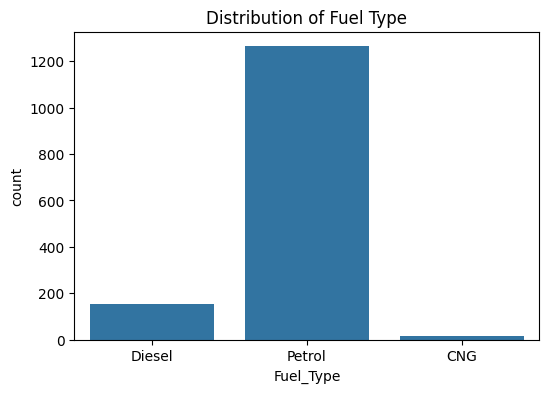

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Fuel_Type'])
plt.title('Distribution of Fuel Type')
plt.show()

## Preprocessing

### Subtask:
Preprocess the data for multiple linear regression. This may involve handling categorical variables, checking for multicollinearity, and considering feature scaling if necessary.


**Reasoning**:
Drop the 'Cylinders' column, convert 'Fuel_Type' using one-hot encoding, and then display the first few rows of the processed DataFrame to verify the changes.



In [31]:
df = df.drop('Cylinders', axis=1)
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=False)
display(df.head())

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,False,True,False
1,13750,23,72937,90,0,2000,3,5,1165,False,True,False
2,13950,24,41711,90,0,2000,3,5,1165,False,True,False
3,14950,26,48000,90,0,2000,3,5,1165,False,True,False
4,13750,30,38500,90,0,2000,3,5,1170,False,True,False


**Reasoning**:
Calculate and display the correlation matrix of the preprocessed DataFrame to examine multicollinearity.



In [32]:
correlation_matrix = df.corr(numeric_only=True)
display(correlation_matrix)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198,-0.039536,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253,0.002389,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598,0.144016,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614,0.062109,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249,0.001486,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637,0.005941,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618,0.009680,0.025495,-0.027589
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613,-0.049537,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000,0.052756,0.568087,-0.560470
Fuel_Type_CNG,-0.039536,0.002389,0.144016,0.062109,0.001486,0.005941,0.009680,-0.049537,0.052756,1.000000,-0.038074,-0.296717


**Reasoning**:
Based on the correlation matrix, we observe high correlation between 'Fuel_Type_Diesel' and 'Fuel_Type_Petrol' (-0.94). While typically we might drop one, the instructions state not to drop highly correlated features at this stage. Define the feature set X by dropping 'Price' and the target variable y as 'Price'.



In [43]:
X = df.drop('Price', axis=1)
y = df['Price']
display(X.head())

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,False,True,False
1,23,72937,90,0,2000,3,5,1165,False,True,False
2,24,41711,90,0,2000,3,5,1165,False,True,False
3,26,48000,90,0,2000,3,5,1165,False,True,False
4,30,38500,90,0,2000,3,5,1170,False,True,False


In [42]:
display(y.head())

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


## Split the dataset

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the features and target into training and testing sets.



In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
899,62,59295,86,0,1300,5,5,1035,False,False,True
881,68,61568,110,0,1600,4,5,1035,False,False,True
310,40,38653,110,0,1600,5,5,1080,False,False,True
1145,75,101855,110,0,1600,5,5,1070,False,False,True
31,22,35199,97,0,1400,3,5,1100,False,False,True


In [46]:
display(X_test.head())

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
594,50,22500,97,0,1400,3,5,1025,False,False,True
754,68,80426,110,0,1600,3,5,1055,False,False,True
630,59,130000,72,0,2000,4,5,1135,False,True,False
1259,71,76000,110,0,1600,5,5,1070,False,False,True
903,65,59000,110,0,1600,5,5,1075,False,False,True


In [47]:
display(X_test.head())

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
594,50,22500,97,0,1400,3,5,1025,False,False,True
754,68,80426,110,0,1600,3,5,1055,False,False,True
630,59,130000,72,0,2000,4,5,1135,False,True,False
1259,71,76000,110,0,1600,5,5,1070,False,False,True
903,65,59000,110,0,1600,5,5,1075,False,False,True


In [48]:
display(y_train.head())

,Price
899,9500
881,9795
310,12950
1145,6450
31,15750


In [49]:
display(y_test.head())

,Price
594,10800
754,9950
630,7500
1259,9250
903,9750


## Build and evaluate multiple linear regression models

### Subtask:
Build at least three different multiple linear regression models using the training data and evaluate their performance on the testing data using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared). Interpret the coefficients of the models.


**Reasoning**:
Build and evaluate three different multiple linear regression models using the training and testing data.



In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model 1: Using all available features
X_train_model1 = X_train
X_test_model1 = X_test

model1 = LinearRegression()
model1.fit(X_train_model1, y_train)
y_pred1 = model1.predict(X_test_model1)

mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
r21 = r2_score(y_test, y_pred1)

print("Model 1 Performance:")
print(f"  Mean Absolute Error (MAE): {mae1}")
print(f"  Mean Squared Error (MSE): {mse1}")
print(f"  R-squared (R2): {r21}")
print("\nModel 1 Coefficients:")
print(f"  Intercept: {model1.intercept_}")
print(f"  Coefficients: {model1.coef_}")



Model 1 Performance:
  Mean Absolute Error (MAE): 990.8872739193934
  Mean Squared Error (MSE): 2203043.8231437025
  R-squared (R2): 0.8348888040611082

Model 1 Coefficients:
  Intercept: -13821.299275879413
  Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01  5.51600710e+02  2.58849583e+01
 -4.34086718e+02 -5.02635474e+02  9.36722192e+02]


In [39]:
# Model 2: Using a subset of features based on correlation analysis ('Age_08_04', 'KM', 'HP', 'Weight')
X_train_model2 = X_train[['Age_08_04', 'KM', 'HP', 'Weight']]
X_test_model2 = X_test[['Age_08_04', 'KM', 'HP', 'Weight']]

model2 = LinearRegression()
model2.fit(X_train_model2, y_train)
y_pred2 = model2.predict(X_test_model2)

mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

print("\nModel 2 Performance:")
print(f"  Mean Absolute Error (MAE): {mae2}")
print(f"  Mean Squared Error (MSE): {mse2}")
print(f"  R-squared (R2): {r22}")


Model 2 Performance:
  Mean Absolute Error (MAE): 1001.2017466053621
  Mean Squared Error (MSE): 1993321.0129730713
  R-squared (R2): 0.8506068681500583


In [40]:
# Model 3: Using another combination of features ('Age_08_04', 'KM', 'Weight', 'Automatic', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol')
X_train_model3 = X_train[['Age_08_04', 'KM', 'Weight', 'Automatic', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']]
X_test_model3 = X_test[['Age_08_04', 'KM', 'Weight', 'Automatic', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']]

model3 = LinearRegression()
model3.fit(X_train_model3, y_train)
y_pred3 = model3.predict(X_test_model3)

mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
r23 = r2_score(y_test, y_pred3)

print("\nModel 3 Performance:")
print(f"  Mean Absolute Error (MAE): {mae3}")
print(f"  Mean Squared Error (MSE): {mse3}")
print(f"  R-squared (R2): {r23}")


Model 3 Performance:
  Mean Absolute Error (MAE): 997.242281641069
  Mean Squared Error (MSE): 2419268.9173103888
  R-squared (R2): 0.8186834142659491


**Reasoning**:
Apply Lasso and Ridge regression to the training data, evaluate their performance on the test data using the appropriate metrics, and print the results for comparison with the multiple linear regression models.



In [52]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression (using all features as in Model 1)
lasso_model = Lasso(alpha=1.0)  # You can tune alpha
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Performance:")
print(f"  Mean Absolute Error (MAE): {mae_lasso}")
print(f"  Mean Squared Error (MSE): {mse_lasso}")
print(f"  R-squared (R2): {r2_lasso}")


Lasso Regression Performance:
  Mean Absolute Error (MAE): 990.9546615053787
  Mean Squared Error (MSE): 2195387.249832785
  R-squared (R2): 0.8354626401159695


In [51]:

# Ridge Regression (using all features as in Model 1)
ridge_model = Ridge(alpha=1.0)  # You can tune alpha
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Performance:")
print(f"  Mean Absolute Error (MAE): {mae_ridge}")
print(f"  Mean Squared Error (MSE): {mse_ridge}")
print(f"  R-squared (R2): {r2_ridge}")


Ridge Regression Performance:
  Mean Absolute Error (MAE): 990.8456615526169
  Mean Squared Error (MSE): 2198251.1073328056
  R-squared (R2): 0.8352480030162172


INTERVIEW **QUESTIONS**

Normalization and standardization are two crucial techniques for **feature scaling** in machine learning. They are used to transform numerical data into a common scale. This helps to prevent features with large magnitudes from dominating the model and ensures all features contribute equally.

* * *

### Normalization (Min-Max Scaling)
Normalization scales data to a specific range, usually between **0 and 1**. This is particularly useful for algorithms that are sensitive to the scale of features, such as k-Nearest Neighbors and neural networks.
$$x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}}$$
where $x$ is the original value, $x_{min}$ is the minimum value, and $x_{max}$ is the maximum value of the feature.

* * *

### Standardization (Z-Score Normalization)
Standardization transforms data to have a **mean of 0 and a standard deviation of 1**. It is especially helpful for algorithms that assume a Gaussian distribution, like Linear Regression and Support Vector Machines. Standardization is also less affected by outliers than normalization.
$$x_{standardized} = \frac{x - \mu}{\sigma}$$
where $x$ is the original value, $\mu$ is the mean, and $\sigma$ is the standard deviation.

* * *

### Multicollinearity - Addressing Techniques
- **Remove highly correlated variables.**
- **Combine correlated variables.**
- **Use PCA for dimensionality reduction.**
- **Apply Lasso or Ridge regression (regularization).**